# 1.1 Waveform data handling in *Obspy*

This chapter shows, how to load, manipulate, process and/or save waveforms in *Obspy* (following the [tutorial](https://docs.obspy.org/tutorial/code_snippets/reading_seismograms.html#accessing-waveform-data)).

It includes 
* loading,
* plotting,
* cutting,
* filtering,
* spectral plot and
* saving

of waveforms.

## Contents:
* [Loading and first inspection](#sec1)
* [Simple processing steps - Cutting, Filtering, Spectral plot](#sec2)
* [Saving](#sec3)
* [Summary](#sum)


## Loading and first inspection <a class="anchor" id="sec1"></a>

Within *Obspy* waveforms are loaded using the `read` function. It will load waveforms from the path(s) into a `stream`: 

In [1]:
# Import of the waveform reading function
from obspy import read

# This is an obspy stream containing the given waveform data
st = read('data/data_GE.KTHA..HHZ_2020-10-30_11-30-26.mseed')

*Obspy* uses a stream as the container for waveform data. Each waveform file loaded is called a `trace`. The `print` command allows to inspect the stream (number of traces loaded etc.)

In [2]:
print(st)

1 Trace(s) in Stream:
GE.KTHA..HHZ | 2020-10-30T11:30:26.980000Z - 2020-10-30T12:30:26.970000Z | 100.0 Hz, 360000 samples


The output shows, that one trace is loaded into the stream of the station `GE.KTHA..HHZ` recorded on 2020-10-30 with a sampling frequency of 100 Hz.

Additional information on a trace is obtained, when extracting the waveform and printing their `stats` (so the stored meta data):

In [3]:
# Extract first trace from the stream
tr = st[0].copy()

# Show trace meta data
print(tr.stats)

         network: GE
         station: KTHA
        location: 
         channel: HHZ
       starttime: 2020-10-30T11:30:26.980000Z
         endtime: 2020-10-30T12:30:26.970000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 360000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 118, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 483328})


We know now something about the record (when, which station, sampling rate etc.), but we have not seen the waveform yet. *Obspy* provides a simple visualization routine: `stream.plot`, which we will use here:

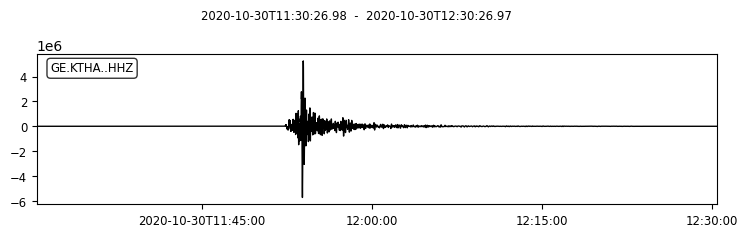

In [4]:
# Plot of the loaded data
st.plot();

## Simple processing steps - Cutting, Filtering, Spectral plot <a class="anchor" id="sec2"></a>

In this section some easy but frequently used processing and analysis tools for seismic waveforms are demonstrated based on the loaded waveform.

The loaded waveform, as seen above, contains the seismic signal from `11:50:00` to around `12:05:00`, but also a long period of quiesence. Let's remove the quiet parts of the waveforms for a better glimps at the actual signal. This can be done with the method `slice`, which requires a time range to cut the waveforms to.
So here we define the time range:

In [5]:
# Import of the obspy time formater
from obspy import UTCDateTime

# Defintion of tmin and tmax
tmin = UTCDateTime('2020-10-30T11:50:00')
tmax = UTCDateTime('2020-10-30T12:05:00')

Now we are able to slice the stream to the decided time range:

In [6]:
# Generate a new stream (st_cut) with the sliced waveform
st_cut = st.slice(starttime=tmin, endtime=tmax)

To inspect, if we have been successful, we can use the `plot` method again:

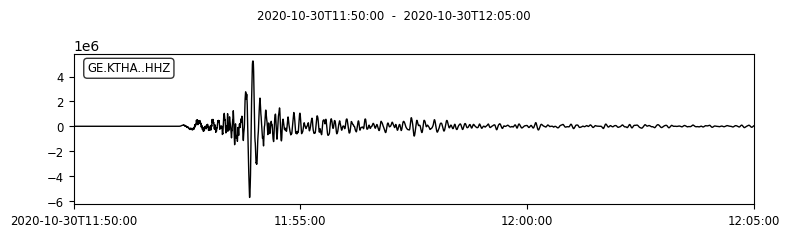

In [7]:
st_cut.plot();

Here we have our earthquake signal. It is characterized by heterogeneous amplitudes and frequencies. A profound look onto the frequency-amplitude distribution over time is provided by the `spectrogram`:

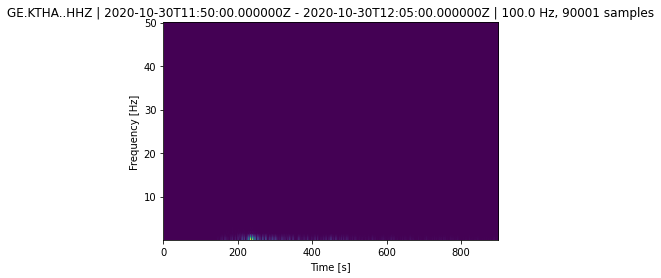

In [8]:
st_cut.spectrogram();

Not much to see here, right? Athough, looking at about 200 s, there is a small colored batch at low frequencies. Let's try to enhance the plot:

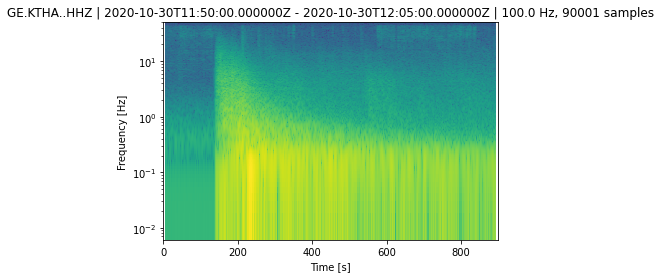

In [9]:
st_cut.spectrogram(
    wlen=10.,  # Use a window length of 10 s
    log=True,  # Display the frequencies in logarithmic scale
    dbscale=True);  # Display the amplitudes (colors) in logarithmic scale

Ah, much better. So, what do we see?
* When does the earthquake start?
* How does the frequency content and the amplitudes change over time?
* In which frequency range do you observe the largest amplitudes?

To look closer into the waveform within the dominant frequency range, let's apply a filter on our cutted waveforms:

In [10]:
st_cut.filter('bandpass', freqmin=0.01, freqmax=0.1)

1 Trace(s) in Stream:
GE.KTHA..HHZ | 2020-10-30T11:50:00.000000Z - 2020-10-30T12:05:00.000000Z | 100.0 Hz, 90001 samples

<div class="alert alert-warning">
    Filtering in <strong>Obspy</strong> might cause phase shifts of the waveform! Please check the documentation carefully!
</div>

And of course we should have a look again at the result.
* What has changed compared to the raw waveform?

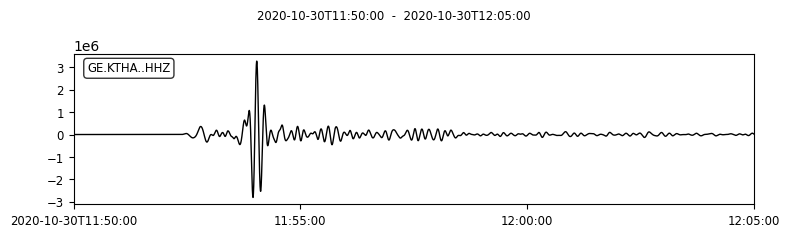

In [11]:
st_cut.plot();

## Saving <a class="anchor" id="sec3"></a>

We have applied multiple processing steps (cutting, filtering) to our raw waveform. The genereated waveform shall be stored now for any later use, so you don't have to apply the processing chain again. This is done using the `trace.write` method.
So we will loop over each trace within our stream and write the trace in the same format as the one loaded (reminder: `data_GE.KTHA..HHZ_2020-10-30_11-30-26.mseed`), but adding a `processed_` flag into it: 

In [19]:
# Iterate over each trace in the stream
for tr in st_cut:
    tstart = tr.stats.starttime.strftime('%Y-%m-%d_%H-%M-%S')
    tr.write('processed_data_' + tr.id + '_' + tstart + ".mseed", format="MSEED")

## Summary <a class="anchor" id="sum"></a>

Here we have covered simple techniques to 
* **load** waveforms into an Obspy stream,
* waveform visualization techniques of the waveform and its frequency content as **plot** and **spectrogram**,
* simple processing steps (**filtering** and **cutting**),
* writing of waveforms into a file (**write**).